In [83]:
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
def printmd(string):
    display(Markdown(string))

In [85]:
fn = 'src/process-mining-tutorial/ArtificialPatientTreatment.csv'
events = pd.read_csv(fn)

events.columns = ['patient', 'action', 'resource', 'datetime']
events['datetime'] = pd.to_datetime(events['datetime'])
events.head()

,patient,action,resource,datetime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [86]:
 ## Get the case start times to get the time deltas for the 'age' of each activity with respect to start
case_starts_ends = events.pivot_table(index='patient', aggfunc={'datetime': ['min', 'max']})
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['patient', 'caseend', 'casestart']
events = events.merge(case_starts_ends, on='patient')
events['relativetime'] = events['datetime'] - events['casestart']
events.head()

,patient,action,resource,datetime,caseend,casestart,relativetime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58


In [87]:
events['action'] = events['action'].apply(lambda x: x.strip())

In [88]:
delimiter = '___'

makeEventString = lambda x: delimiter.join(x)
makeEventString.__name__ = 'makeEventString'

numEvents = lambda x: len(x)
numEvents.__name__ = 'numEvents'


caselogs = events.pivot_table(index='patient', aggfunc={'action': [makeEventString, numEvents]})
caselogs = caselogs.reset_index()
caselogs.columns = ['patient', 'action_sequence', 'numactions']

events = pd.merge(events, caselogs, on='patient')
events['caselength'] = events['caseend'] - events['casestart']

events.head()

,patient,action,resource,datetime,caseend,casestart,relativetime,action_sequence,numactions,caselength
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,First consult___Blood test___Physical test___S...,6,6 days 20:49:17
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,First consult___Blood test___Physical test___S...,6,6 days 20:49:17
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,First consult___Blood test___Physical test___S...,6,6 days 20:49:17
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,First consult___Blood test___Physical test___S...,6,6 days 20:49:17
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,First consult___Blood test___Physical test___S...,6,6 days 20:49:17


In [89]:
## Get day of week
events['weekday'] = events['datetime'].apply(lambda x: x.weekday())
events['date'] = events['datetime'].apply(lambda x: x.date())
events['startdate'] = events['casestart'].apply(lambda x: x.date())
events['hour'] = events['datetime'].apply(lambda x: x.time().hour)
## Get relative times in more friendly terms
events['relativetime_s'] = events['relativetime'].dt.seconds + 86400*events['relativetime'].dt.days
events['relativedays'] = events['relativetime'].dt.days

In [90]:
 events.head()

,patient,action,resource,datetime,caseend,casestart,relativetime,action_sequence,numactions,caselength,weekday,date,startdate,hour,relativetime_s,relativedays
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,11,0,0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,12,4042,0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,12,4419,0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,0,2017-01-02,2017-01-02,16,16855,0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,First consult___Blood test___Physical test___S...,6,6 days 20:49:17,3,2017-01-05,2017-01-02,13,265378,3


In [91]:
#!pip install pm4py --user
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [92]:
eventlog = events.copy()
### Specify which columns correspond to case (case:concept:name), 
###event (concept:name) and timestamp (time:timestamp) - rename columns in accordance
###with pm4py

eventlog.rename(columns={'datetime': 'time:timestamp', 'patient': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)

## Convert to log format
log = log_converter.apply(eventlog)
log


[{'attributes': {'concept:name': 'patient 0'}, 'events': [{'concept:name': 'First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': Timestamp('2017-01-02 11:40:11'), 'caseend': Timestamp('2017-01-09 08:29:28'), 'casestart': Timestamp('2017-01-02 11:40:11'), 'relativetime': Timedelta('0 days 00:00:00'), 'action_sequence': 'First consult___Blood test___Physical test___Second consult___Surgery___Final consult', 'numactions': 6, 'caselength': Timedelta('6 days 20:49:17'), 'weekday': 0, 'date': datetime.date(2017, 1, 2), 'startdate': datetime.date(2017, 1, 2), 'hour': 11, 'relativetime_s': 0, 'relativedays': 0}, '..', {'concept:name': 'Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': Timestamp('2017-01-09 08:29:28'), 'caseend': Timestamp('2017-01-09 08:29:28'), 'casestart': Timestamp('2017-01-02 11:40:11'), 'relativetime': Timedelta('6 days 20:49:17'), 'action_sequence': 'First consult___Blood test___Physical test___Second consult___Surgery___Final consult', 'numactions'

In [93]:
from pm4py.objects.log.util import get_log_representation

data, feature_names = get_log_representation.get_default_representation(log)
print(feature_names)

['event:concept:name@Blood test', 'event:concept:name@Final consult', 'event:concept:name@First consult', 'event:concept:name@Medicine', 'event:concept:name@Physical test', 'event:concept:name@Second consult', 'event:concept:name@Surgery', 'event:concept:name@X-ray scan', 'event:relativetime_s', 'event:numactions', 'event:relativedays', 'event:weekday', 'event:hour']


In [94]:
data

array([[ 1,  1,  1, ...,  6,  0,  8],
       [ 1,  1,  1, ...,  4,  4, 16],
       [ 1,  1,  1, ..., 13,  1, 11],
       ...,
       [ 1,  1,  1, ...,  5,  0, 14],
       [ 1,  1,  1, ..., 14,  2, 14],
       [ 1,  1,  1, ..., 13,  2, 12]])

<h4> Anomaly detection

In [95]:
import pandas as pd
df = pd.DataFrame(data, columns=feature_names)
df

,event:concept:name@Blood test,event:concept:name@Final consult,event:concept:name@First consult,event:concept:name@Medicine,event:concept:name@Physical test,event:concept:name@Second consult,event:concept:name@Surgery,event:concept:name@X-ray scan,event:relativetime_s,event:numactions,event:relativedays,event:weekday,event:hour
0,1,1,1,0,1,1,1,0,593357,6,6,0,8
1,1,1,1,1,1,1,0,1,359926,7,4,4,16
2,1,1,1,1,1,1,0,1,1129919,7,13,1,11
3,1,1,1,1,1,1,0,1,1026368,7,11,1,13
4,1,1,1,1,1,1,0,1,1196574,7,13,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,0,1,1,1,0,954266,6,11,4,10
96,1,1,1,1,1,1,0,1,799596,7,9,2,16
97,1,1,1,1,1,1,0,1,453235,7,5,0,14
98,1,1,1,0,1,1,1,1,1221565,7,14,2,14


In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
df2 = pd.DataFrame(pca.fit_transform(df))

In [97]:
df2

,0,1,2,3,4
0,234099.440006,-5.056761,-1.348567,1.783601,0.378244
1,467530.440037,2.834607,1.321287,-0.172491,-0.183911
2,-302462.560028,-0.447830,-0.713862,-0.340515,0.079107
3,-198911.560007,1.192413,-1.001870,-0.317632,0.163057
4,-369117.560032,-3.424009,-1.322569,-0.414187,0.097664
...,...,...,...,...,...
95,-126809.560018,-1.585827,2.512814,1.221182,0.672444
96,27860.440009,3.737435,-0.462293,-0.171639,0.058702
97,374221.440024,0.613836,-2.340869,0.220279,-0.272090
98,-394108.560025,2.861815,0.130340,0.804980,-0.345579


In [98]:
from sklearn.ensemble import IsolationForest
model=IsolationForest()
model.fit(df2)
df2["scores"] = model.decision_function(df2)

In [99]:
df2["@@index"] = df2.index
df2 = df2[["scores", "@@index"]]
df2 = df2.sort_values("scores")
df2

,scores,@@index
0,-0.151015,0
25,-0.126232,25
40,-0.117148,40
33,-0.095757,33
27,-0.081944,27
...,...,...
82,0.092647,82
53,0.094776,53
49,0.095782,49
43,0.096294,43


<h1> Streaming 

In [100]:
from pm4py.streaming.stream.live_event_stream import LiveEventStream

live_event_stream = LiveEventStream()

In [101]:
from pm4py.streaming.algo.discovery.dfg import algorithm as dfg_discovery

streaming_dfg = dfg_discovery.apply()

In [102]:
live_event_stream.register(streaming_dfg)

In [103]:
live_event_stream.start()

In [104]:

from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('data/running-example.xes')

In [105]:
from pm4py.objects.conversion.log import converter as stream_converter
static_event_stream = stream_converter.apply(log, variant=stream_converter.Variants.TO_EVENT_STREAM)

In [106]:
for ev in static_event_stream:
    live_event_stream.append(ev)

In [107]:
live_event_stream.stop()

In [108]:
dfg, activities, sa, ea = streaming_dfg.get()

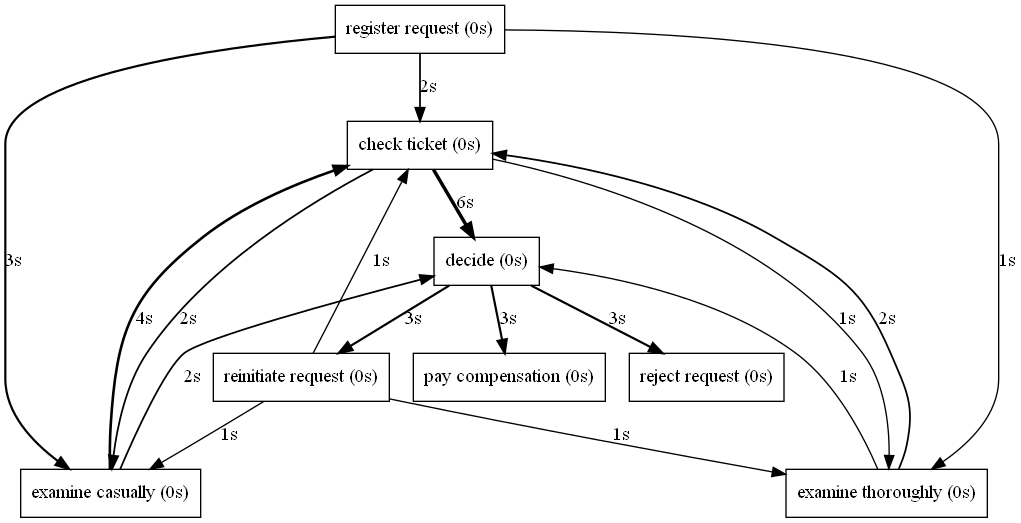

In [109]:
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)


In [110]:
print(dfg)

{('reinitiate request', 'examine casually'): 1, ('decide', 'pay compensation'): 3, ('register request', 'examine thoroughly'): 1, ('decide', 'reject request'): 3, ('examine thoroughly', 'decide'): 1, ('reinitiate request', 'examine thoroughly'): 1, ('examine casually', 'check ticket'): 4, ('register request', 'check ticket'): 2, ('register request', 'examine casually'): 3, ('check ticket', 'decide'): 6, ('check ticket', 'examine thoroughly'): 1, ('check ticket', 'examine casually'): 2, ('decide', 'reinitiate request'): 3, ('reinitiate request', 'check ticket'): 1, ('examine thoroughly', 'check ticket'): 2, ('examine casually', 'decide'): 2}


<h3> Conformance Check

In [111]:
log = xes_importer.apply('data/running-example.xes')
static_event_stream = log_converter.apply(log, variant=log_converter.Variants.TO_EVENT_STREAM)

In [112]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
tree = inductive_miner.apply_tree(log, variant=inductive_miner.Variants.IMf)

In [113]:
from pm4py.objects.conversion.process_tree import converter as pt_converter
net, im, fm = pt_converter.apply(tree)                                    

In [114]:
from pm4py.streaming.algo.conformance.tbr import algorithm as tbr_algorithm
live_event_stream = LiveEventStream()
streaming_tbr = tbr_algorithm.apply(net, im, fm)

In [115]:
live_event_stream.register(streaming_tbr)
live_event_stream.start()

In [116]:
for ev in static_event_stream:
    live_event_stream.append(ev)
live_event_stream.stop()

In [117]:
conf_stats = streaming_tbr.get()
print(conf_stats)

  case  is_fit  missing
0    3    True        0
1    5    True        0
2    6    True        0
3    1    True        0
4    4    True        0
5    2    True        0


<h2> Streaming healthcare data

In [118]:
live_event_stream = LiveEventStream()
streaming_dfg = dfg_discovery.apply()
live_event_stream.register(streaming_dfg)
live_event_stream.start()

In [119]:
log = log_converter.apply(eventlog)
static_event_stream = stream_converter.apply(log, variant=stream_converter.Variants.TO_EVENT_STREAM)


In [120]:
for ev in static_event_stream:
    live_event_stream.append(ev)

In [121]:
live_event_stream.stop()

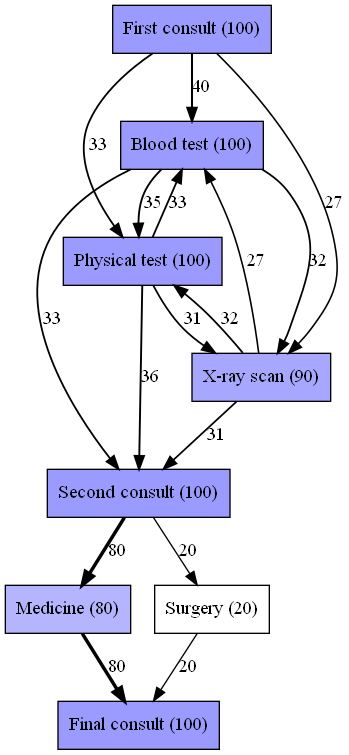

In [122]:
dfg, activities, sa, ea = streaming_dfg.get()
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)


In [123]:
print(dfg)

{('X-ray scan', 'Blood test'): 27, ('Blood test', 'Physical test'): 35, ('Second consult', 'Surgery'): 20, ('Medicine', 'Final consult'): 80, ('First consult', 'X-ray scan'): 27, ('Blood test', 'X-ray scan'): 32, ('First consult', 'Physical test'): 33, ('X-ray scan', 'Second consult'): 31, ('Second consult', 'Medicine'): 80, ('Blood test', 'Second consult'): 33, ('Physical test', 'X-ray scan'): 31, ('First consult', 'Blood test'): 40, ('Physical test', 'Second consult'): 36, ('Physical test', 'Blood test'): 33, ('X-ray scan', 'Physical test'): 32, ('Surgery', 'Final consult'): 20}


<h3> Conformance check

In [124]:
static_event_stream = log_converter.apply(log, variant=log_converter.Variants.TO_EVENT_STREAM)

In [125]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
tree = inductive_miner.apply_tree(log, variant=inductive_miner.Variants.IMf)

In [126]:
from pm4py.objects.conversion.process_tree import converter as pt_converter
net, im, fm = pt_converter.apply(tree)

In [127]:
live_event_stream = LiveEventStream()

In [128]:
from pm4py.streaming.algo.conformance.tbr import algorithm as tbr_algorithm
streaming_tbr = tbr_algorithm.apply(net, im, fm)

In [129]:
live_event_stream.register(streaming_tbr)
live_event_stream.start()

In [130]:
for ev in static_event_stream:
    live_event_stream.append(ev)

ERROR:root:the activity Second consult could not be executed without inserting missing tokens! case: patient 0
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\pm4py\streaming\algo\interface.py", line 48, in receive
    self._process(event)
  File "C:\anaconda3\lib\site-packages\pm4py\streaming\algo\conformance\tbr\variants\classic.py", line 146, in _process
    self.verify_tbr(self.encode_str(case), activity)
  File "C:\anaconda3\lib\site-packages\pm4py\streaming\algo\conformance\tbr\variants\classic.py", line 219, in verify_tbr
    if pl not in marking or new_marking[pl] < mark:
TypeError: 'NoneType' object is not subscriptable
ERROR:root:the activity Surgery could not be executed without inserting missing tokens! case: patient 0
ERROR:root:the activity Blood test could not be executed without inserting missing tokens! case: patient 2


In [131]:
live_event_stream.stop()

ERROR:root:the activity Final consult could not be executed without inserting missing tokens! case: patient 1
ERROR:root:the activity Second consult could not be executed without inserting missing tokens! case: patient 6
ERROR:root:the activity X-ray scan could not be executed without inserting missing tokens! case: patient 8
ERROR:root:the activity Second consult could not be executed without inserting missing tokens! case: patient 9
ERROR:root:the activity Final consult could not be executed without inserting missing tokens! case: patient 8
ERROR:root:the activity Physical test could not be executed without inserting missing tokens! case: patient 11
ERROR:root:the activity Second consult could not be executed without inserting missing tokens! case: patient 10
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\pm4py\streaming\algo\interface.py", line 48, in receive
    self._process(event)
  File "C:\anaconda3\lib\site-packages\pm4py\streaming\algo\conformance\t

In [132]:
conf_stats = streaming_tbr.get()
print(conf_stats)

          case  is_fit  missing
0   patient 21    True        0
1   patient 96    True        0
2   patient 37    True        0
3   patient 82    True        0
4   patient 33   False        1
..         ...     ...      ...
95  patient 57    True        0
96  patient 29   False        2
97  patient 55    True        0
98   patient 8   False        2
99  patient 14    True        0

[100 rows x 3 columns]


<h2> Simulation

In [135]:
from pm4py.simulation.playout import simulator

simulated_log = simulator.apply(net, im, variant=simulator.Variants.EXTENSIVE, parameters={simulator.Variants.EXTENSIVE.value.Parameters.MAX_TRACE_LENGTH: 7})

In [136]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg_perf = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
from pm4py.statistics.start_activities.log import get as start_activities
from pm4py.statistics.end_activities.log import get as end_activities
sa = start_activities.get_start_activities(log)
ea = end_activities.get_end_activities(log)

In [137]:
from pm4py.statistics.traces.log import case_arrival
ratio = case_arrival.get_case_arrival_avg(log)
print(ratio)

118701.21212121213


In [138]:
from pm4py.objects.conversion.dfg import converter
net, im, fm = converter.apply(dfg_perf, variant=converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE,
                              parameters={converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE.value.Parameters.START_ACTIVITIES: sa,
                                          converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE.value.Parameters.END_ACTIVITIES: ea})

In [139]:
from pm4py.simulation.montecarlo import simulator as montecarlo_simulation
from pm4py.algo.conformance.tokenreplay.algorithm import Variants
parameters = {}
parameters[
    montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.TOKEN_REPLAY_VARIANT] = Variants.BACKWARDS
parameters[montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.PARAM_CASE_ARRIVAL_RATIO] = 10800
simulated_log, res = montecarlo_simulation.apply(log, net, im, fm, parameters=parameters)

INFO:pm4py.simulation.montecarlo.variants.petri_semaph_fifo:1615210463.333333 started the replay operation.
C:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
INFO:pm4py.simulation.montecarlo.variants.petri_semaph_fifo:1615210463.7183778 ended the replay operation.
INFO:pm4py.simulation.montecarlo.variants.petri_semaph_fifo:1615210495.7282927 diagnostics for thread 0: blocked places by semaphore: {source: 0, Physical test: 0, X-ray scan: 0, First consult: 0, Blood test: 0}
INFO:pm4py.simulation.montecarlo.variants.petri_semaph_fifo:1615210495.7587812 diagnostics for thread 1: blocked places by semaphore: {source: 0, Physical test: 0, X-ray scan: 0, First consult: 0, Blood test: 0}
INFO:pm4py.simulation.montecarlo.variants.petri_semaph_fifo:1615210495.7747478 diagnostics for thread 2: blocked places by semaphore: {source: 0, Physical test: 0, X-ray scan: 0, Fi

In [141]:
import random
last_timestamp = max(event["time:timestamp"] for trace in log for event in trace).timestamp()
first_timestamp = min(event["time:timestamp"] for trace in log for event in trace).timestamp()
pick_trans = random.choice(list(res["transitions_interval_trees"]))
print(pick_trans)
n_div = 10
i = 0
while i < n_div:
    timestamp = first_timestamp + (last_timestamp - first_timestamp)/n_div * i
    print("\t", timestamp, len(res["transitions_interval_trees"][pick_trans][timestamp]))
    i = i + 1
                  

First consult_1
	 1483357211.0 0
	 1484645507.2 0
	 1485933803.4 0
	 1487222099.6 0
	 1488510395.8 0
	 1489798692.0 0
	 1491086988.2 0
	 1492375284.4 0
	 1493663580.6 0
	 1494951876.8 0


In [142]:
import random
last_timestamp = max(event["time:timestamp"] for trace in log for event in trace).timestamp()
first_timestamp = min(event["time:timestamp"] for trace in log for event in trace).timestamp()
pick_place = random.choice(list(res["places_interval_trees"]))
print(pick_place)
n_div = 10
i = 0
while i < n_div:
    timestamp = first_timestamp + (last_timestamp - first_timestamp)/n_div * i
    print("\t", timestamp, len(res["places_interval_trees"][pick_place][timestamp]))
    i = i + 1

Second consult
	 1483357211.0 0
	 1484645507.2 0
	 1485933803.4 0
	 1487222099.6 0
	 1488510395.8 0
	 1489798692.0 0
	 1491086988.2 0
	 1492375284.4 0
	 1493663580.6 0
	 1494951876.8 0
